# Tarea 2

#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

Fecha de entrega: Domingo 15 de junio 

Alan Badillo Salas

**1.** Dada la siguiente lista de vectores en $ \mathbb{R}^3$:

$$
\text{vectores} = \left\{ [0, 1, 0],\ [1, 1, 0],\ [1, 2, 3],\ [-1, 0, 1],\ [0, 0, 1],\ [-1, 1, 0],\ [2, 1, 1],\ [3, 0.5, -1] \right\}
$$

escriba una función que calcule el **ángulo** que cada uno de estos vectores forma con respecto al vector fijo $ \mathbf{a} = [1, 0, 0] $, y muestre únicamente aquellos vectores cuyo ángulo sea mayor a $ 80^\circ $, junto con el valor correspondiente del ángulo (en grados).




In [2]:
import numpy

def angulo(u, a = [1, 0, 0]):
    a = numpy.array(a)
    u = numpy.array(u)
    na = a.dot(a)
    nu = u.dot(u)
    return numpy.degrees(numpy.acos(a.dot(u) / (na * nu)))

In [25]:
vectores = [
    [0, 1, 0],
    [1, 1, 0],
    [1, 2, 3],
    [-1, 0, 1],
    [0, 0, 1],
    [-1, 1, 0],
    [2, 1, 1],
    [3, 0.5, -1],
]

for vec in vectores:
    t = angulo(vec)

    if t >= 80:
        print(f"({', '.join([f'{x:2.0f}' for x in vec])}) | {t:6.2f}°")

( 0,  1,  0) |  90.00°
( 1,  2,  3) |  85.90°
(-1,  0,  1) | 120.00°
( 0,  0,  1) |  90.00°
(-1,  1,  0) | 120.00°


**2.** Sea la siguiente función definida por partes:

$$
f(x, y) =
\begin{cases}
\sin(x^2 + y^2), & \text{si } x^2 + y^2 \leq 4 \\
\cos(x - y), & \text{si } 4 < x^2 + y^2 < 12  \\
-1, & \text{si }   12 \leq x^2 + y^2
\end{cases}
$$

Visualice la función en el dominio $ [-6, 6] \times [-6, 6] $ utilizando `plt.imshow()`.


In [42]:
x = numpy.linspace(-6, 6, 6)
y = numpy.linspace(-6, 6, 6)

X, Y = numpy.meshgrid(x, y)

X, Y

(array([[-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ],
        [-6. , -3.6, -1.2,  1.2,  3.6,  6. ]]),
 array([[-6. , -6. , -6. , -6. , -6. , -6. ],
        [-3.6, -3.6, -3.6, -3.6, -3.6, -3.6],
        [-1.2, -1.2, -1.2, -1.2, -1.2, -1.2],
        [ 1.2,  1.2,  1.2,  1.2,  1.2,  1.2],
        [ 3.6,  3.6,  3.6,  3.6,  3.6,  3.6],
        [ 6. ,  6. ,  6. ,  6. ,  6. ,  6. ]]))

In [43]:
R = X ** 2 + Y ** 2

R

array([[72.  , 48.96, 37.44, 37.44, 48.96, 72.  ],
       [48.96, 25.92, 14.4 , 14.4 , 25.92, 48.96],
       [37.44, 14.4 ,  2.88,  2.88, 14.4 , 37.44],
       [37.44, 14.4 ,  2.88,  2.88, 14.4 , 37.44],
       [48.96, 25.92, 14.4 , 14.4 , 25.92, 48.96],
       [72.  , 48.96, 37.44, 37.44, 48.96, 72.  ]])

In [53]:
R <= 4

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False,  True,  True, False, False],
       [False, False,  True,  True, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [54]:
(R <= 4) * 1

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [59]:
(R <= 4) * numpy.sin(R).round(3)

array([[ 0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ],
       [-0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ],
       [-0.   ,  0.   ,  0.259,  0.259,  0.   , -0.   ],
       [-0.   ,  0.   ,  0.259,  0.259,  0.   , -0.   ],
       [-0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ],
       [ 0.   , -0.   , -0.   , -0.   , -0.   ,  0.   ]])

In [64]:
Z = R * 0
Z += (R <= 4) * numpy.sin(R)
Z += ((R > 4) & (R < 12)) * numpy.cos(X - Y)
Z += (12 <= R) * (-1)

Z.round(3)

array([[-1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   ,  0.259,  0.259, -1.   , -1.   ],
       [-1.   , -1.   ,  0.259,  0.259, -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   ]])

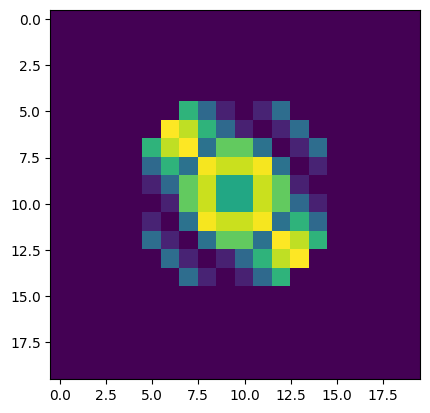

In [66]:
import matplotlib.pyplot as pyplot

x = numpy.linspace(-6, 6, 20)
y = numpy.linspace(-6, 6, 20)

X, Y = numpy.meshgrid(x, y)

R = X ** 2 + Y ** 2

Z = R * 0
Z += (R <= 4) * numpy.sin(R)
Z += ((R > 4) & (R < 12)) * numpy.cos(X - Y)
Z += (12 <= R) * (-1)

pyplot.imshow(Z)

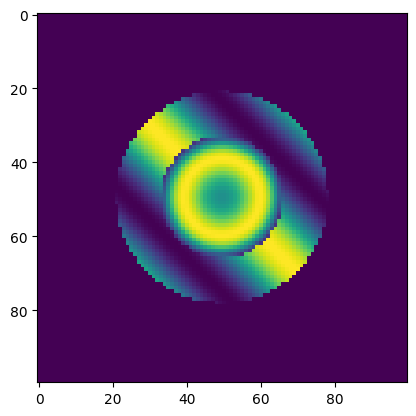

In [67]:
import matplotlib.pyplot as pyplot

x = numpy.linspace(-6, 6, 100)
y = numpy.linspace(-6, 6, 100)

X, Y = numpy.meshgrid(x, y)

R = X ** 2 + Y ** 2

Z = R * 0
Z += (R <= 4) * numpy.sin(R)
Z += ((R > 4) & (R < 12)) * numpy.cos(X - Y)
Z += (12 <= R) * (-1)

pyplot.imshow(Z)

**3.** Resuelva el siguiente sistema de ecuaciones lineales:

$$
\begin{aligned}
2x_1 - x_2 + 3x_3 + x_4 - x_5 &= 7 \\
x_1 + 2x_2 - x_3 + 2x_4 + x_5 &= 4 \\
3x_1 - x_2 + x_3 - x_4 + 2x_5 &= 10 \\
x_1 + x_2 + x_3 + x_4 + x_5 &= 5 \\
-2x_1 + 4x_2 + x_3 - 3x_4 + x_5 &= 0
\end{aligned}
$$

1. Resuelva el sistema.

2. Verifique la solución sustituyéndola en la ecuación original y evaluando $ \|A\mathbf{x} - \mathbf{b}\| $.


**4.** Genera un array de 400 números aleatorios con distribución normal de media 10 y desviación estándar 2. 

- Calcula la media y desviación estándar de la muestra.

- ¿Cuántos valores están entre 8 y 12?

**5.** Simula una muestra de 200 observaciones donde cada valor puede ser 'A', 'B' o 'C' con probabilidades 0.5, 0.3 y 0.2, respectivamente (np.random.choice). Cuenta cuántas veces ocurre cada categoría.

**6.** Genera una señal base (por ejemplo, todos 100) y agrégale ruido gaussiano con desviación 5.

- Grafica la señal ruidosa.

- Calcula el error medio cuadrático con respecto a la señal original:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }
$$

Donde:
- $ y_i $ son los valores de la señal base,
- $ \hat{y}_i $ son los valores de la señal ruidosa,
- $ n $ es el número total de observaciones.

**7.** Dada la siguiente lista:

cadenas = [
    '  juan*perez!!', 'ana#LOPEZ? ', 'm@rio@@gomez', 'luis* #MORA%%', 'carla!!méndóza ',
    'PEDRO?ROSALES###', 'sofia*#cano ', 'miguel//torres', 'lucia #ramirez:', ' josé+fernández  ',
    ' camila#RUIZ', 'marco*antonio&', 'isaBel!!GARZA', '#roberto flores* ', ' emiLIA?Reyes!',
    'DANIEL* #Martinez', '  andrés#s@las', '*pablo TORO/', ' yeSEnIa!lópez ', 'elena#morales?',
    'Nicolás*rodríguez', ' carmen?LUNA:', 'Rosa#*AVILA', 'oscar?*pineda;', 'alejandra!ríos+',
    'IGNACIO#HERRERA  ', ' sergio*MENDOZA', 'tomás#ramírez=', 'ANDREA!MORENO?', '#manuel ortíz ',
    'cristina*FLORES@', ' arturo#valdez;', 'LAURA*méndez', 'mariana?*ibarra!', ' esteban#quiroz ',
    'valeria!CASTILLO', 'renata#DE la cruz', 'fernando*?Vega:', 'irma!ZAPATA%', 'francisco#romero ',
    'alicia*Lara=', 'liliana#MENDEZ&', 'matías*#galván;', '#ricardo!Ríos', ' catalina*ALVARADO%',
    'gustavo!morales+', 'natalia#VILLARREAL:', 'andréa*páez;', '  Ramón*salinas!', ' david#molina '
]

1. Limpie la lista 'cadenas'
2. Obtenga 50 etiquetas con el código: `[f'id_{i:03}' for i in range(1, 51)]`
3. Obtenga un objeto Series con la lista 'cadenas' indexado con las etiquetas obtenidas. 
